<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/svm_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVR

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')


In [48]:
x = df.iloc[:, 1].values 
x = x.reshape((len(x),1)) 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [49]:
y = df.iloc[:, -1].values
y = y.reshape((len(y),1))

In [50]:
#most important thing SVR does not have feature scaling so we have to do it
from sklearn.preprocessing import StandardScaler
sec = StandardScaler()
x = sec.fit_transform(x)
secy = StandardScaler()
y = secy.fit_transform(y)

In [51]:
y = y.reshape((len(y), ))
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [52]:
#fitiing SVR to datasets
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

SVR()

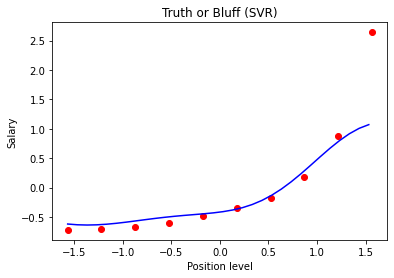

In [53]:
#visualising SVR training set
x1 = np.arange(min(x), max(x), 0.1)
x1 = x1.reshape((len(x1),1))
plt.scatter(x,y,color='red')
plt.plot(x1, regressor.predict(x1), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


#Linear SVM

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [55]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

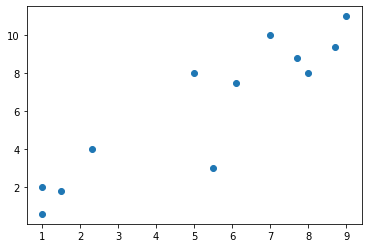

In [56]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [57]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [58]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [59]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

No handles with labels found to put in legend.


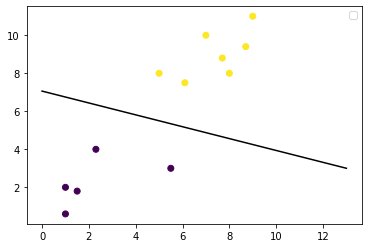

In [60]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

#Non Liner SVM

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [62]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

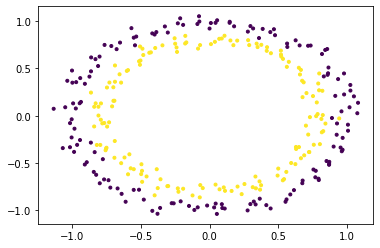

In [63]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [64]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [65]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [66]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

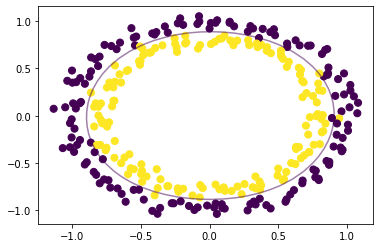

In [67]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()